In [2]:
import bs4
import requests
import pandas as pd
import numpy as np
#!pip install boto3
#import boto3
import matplotlib.pyplot as plt
from IPython.display import display
from bs4 import BeautifulSoup
import urllib

In [3]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/James_Harden'):
  response = requests.get(link)
  soup = bs4.BeautifulSoup(response.content, 'html.parser')
  print(soup)
#  return response,soup        

In [4]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/James_Harden'):
  response = requests.get(link)
  soup = bs4.BeautifulSoup(response.text, 'html.parser')
  #print(soup)
  table=soup.find(class_='wikitable sortable')
  headers = table.tr
  titles = headers.find_all('abbr')
  data = {title['title']: [] for title in titles}
  for row in table.find_all('tr')[1:]:
    for key, a in zip(data.keys(),row.find_all('td')[2:]):
      data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))
    Min = min([len(x) for x in data.values()])
    for key in data.keys():
      data[key] = list(map(lambda x: float(x), data[key][:Min]))
  return data


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [6]:
links=['https://en.wikipedia.org/wiki/James_Harden'\
,'https://en.wikipedia.org/wiki/Michael_Jordan'\
,'https://en.wikipedia.org/wiki/LeBron_James'\
,'https://en.wikipedia.org/wiki/Stephen_Curry']

names=['james harden','Michael Jordan','Lebron James','Stephen Curry']
james_harden_dict = get_basketball_stats(links[0])
michael_jordan_dict = get_basketball_stats(links[1])
lebron_james_dict = get_basketball_stats(links[2])
stephen_curry_dict = get_basketball_stats(links[3])

jh_table = pd.DataFrame(james_harden_dict)
mj_table = pd.DataFrame(michael_jordan_dict)
lj_table = pd.DataFrame(lebron_james_dict)
sc_table = pd.DataFrame(stephen_curry_dict)


list_table =[jh_table,mj_table,lj_table,sc_table]

i = 0
for name in names:
    print(name)
    display(list_table[i])
    i += 1


james harden


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,76.0,0.0,22.9,0.403,0.375,0.808,3.2,1.8,1.1,0.3,9.9
1,82.0,5.0,26.7,0.436,0.349,0.843,3.1,2.1,1.1,0.3,12.2
2,62.0,2.0,31.4,0.491,0.390,0.846,4.1,3.7,1.0,0.2,16.8
3,78.0,78.0,38.3,0.438,0.368,0.851,4.9,5.8,1.8,0.5,25.9
4,73.0,73.0,38.0,0.456,0.366,0.866,4.7,6.1,1.6,0.4,25.4
5,81.0,81.0,36.8,0.440,0.375,0.868,5.7,7.0,1.9,0.7,27.4
6,82.0,82.0,38.1,0.439,0.359,0.860,6.1,7.5,1.7,0.6,29.0
7,81.0,81.0,36.4,0.440,0.347,0.847,8.1,11.2,1.5,0.5,29.1
8,72.0,72.0,35.4,0.449,0.367,0.858,5.4,8.8,1.8,0.7,30.4
9,78.0,78.0,36.8,0.442,0.368,0.879,6.6,7.5,2.0,0.7,36.1


Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4
6,76.0,76.0,39.0,0.503,0.333,0.767,7.3,8.6,1.6,1.0,29.7
7,79.0,79.0,38.8,0.510,0.330,0.759,7.5,7.0,1.6,0.6,26.7
8,62.0,62.0,37.5,0.531,0.362,0.771,7.9,6.2,1.9,0.8,27.1
9,76.0,76.0,37.9,0.565,0.406,0.753,8.0,7.3,1.7,0.9,26.8


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0
5,80.0,80.0,32.7,0.487,0.443,0.914,4.3,7.7,2.0,0.2,23.8
6,79.0,79.0,34.2,0.504,0.454,0.908,5.4,6.7,2.1,0.2,30.1
7,79.0,79.0,33.4,0.468,0.411,0.898,4.5,6.6,1.8,0.2,25.3
8,51.0,51.0,32.0,0.495,0.423,0.921,5.1,6.1,1.6,0.2,26.4
9,69.0,69.0,33.8,0.472,0.437,0.916,5.3,5.2,1.3,0.4,27.3


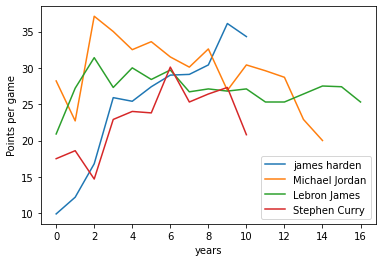

In [7]:
j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1


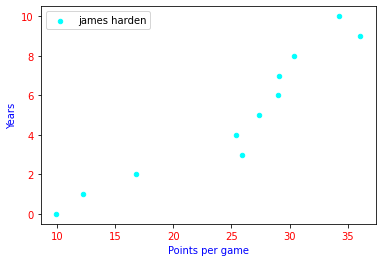

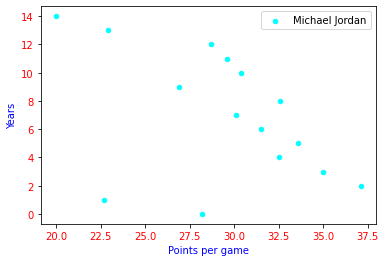

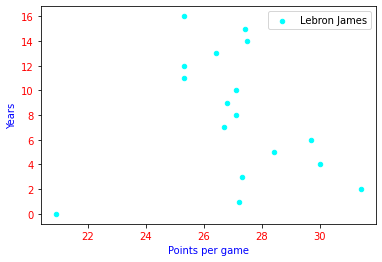

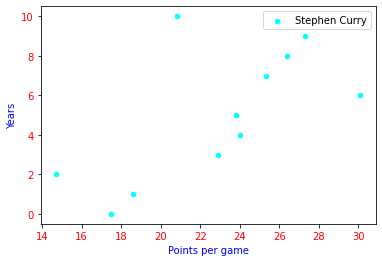

In [8]:
j=0
for name in names:  
  list_table[j].reset_index().plot(x="Points per game", y=["index"],kind="scatter", color=['cyan'],label=name)
  plt.legend()
  plt.xlabel("Points per game",color='blue')
  plt.ylabel("Years",color='blue')
  plt.xticks(rotation=0,color='red')
  plt.yticks(color='red')
  j+=1

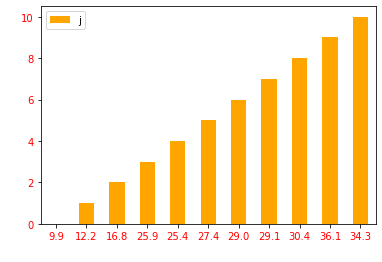

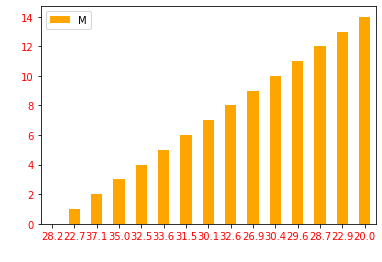

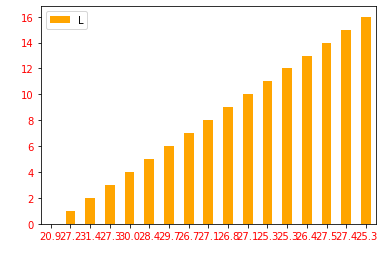

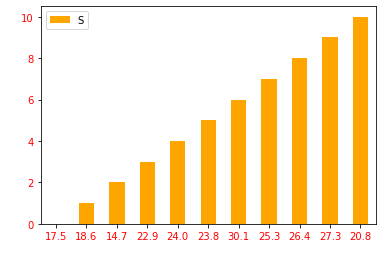

In [9]:
j = 0

list_table =[jh_table,mj_table,lj_table,sc_table]
for name in names:
  list_table[j].reset_index().plot(x="Points per game", y=["index"],kind="bar", color=['orange'])
  plt.legend(name)
  plt.xlabel("Points per game",color='white')
  plt.ylabel("Years",color='white')
  plt.xticks(rotation=0,color='red')
  plt.yticks(color='red')
  j+=1


In [10]:
csv_name = 'MJ1.csv'
mj_table.to_csv(csv_name)
mj_table


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9
